# Germany EDA

## Our goal
A year since the beginning of the pandemic, governments and their constituents are eager for a safe return to public life - but lack the data visibility and tools they need to make informed decisions.
This project aims to help governments establish a **safe planning schema** for de- and re-confinement, and also to **navigate upcoming waves** of viral transmission and other adverse impacts. 

Our goal is to develop an ML prototype capable of **forecasting safe dates** for adjusting confinement protocol and other measures for a given region, and **simulate the impact** of different timelines on likely transmission rates and population health outcomes.

## This notebook
This notebook takes in raw data on counts of patients as well as other dependent factors of Covid-19, collected from different countries of the world. The target country is **Germany**- thus, cleaning and analysis of variables in this country is performed.


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

**Extraction**

Let us first read the data as a pandas dataframe, and then extract data for Germany.

In [2]:
covid_data= pd.read_csv('../dataset/owid-covid-data.csv')

In [3]:
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50006,NaN,NaN,International,2020-10-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50007,NaN,NaN,International,2020-10-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50008,NaN,NaN,International,2020-10-13,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50009,NaN,NaN,International,2020-10-14,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
covid_data.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

In [5]:
germany_data=covid_data[covid_data['location']=='Germany']
germany_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
11750,DEU,Europe,Germany,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11751,DEU,Europe,Germany,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11752,DEU,Europe,Germany,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11753,DEU,Europe,Germany,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11754,DEU,Europe,Germany,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936


In [6]:
germany_data.shape

(290, 41)

In [7]:
germany_data=germany_data.reset_index()
germany_data.drop('index', axis=1, inplace=True)
germany_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,DEU,Europe,Germany,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
1,DEU,Europe,Germany,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
2,DEU,Europe,Germany,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
3,DEU,Europe,Germany,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
4,DEU,Europe,Germany,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,DEU,Europe,Germany,2020-10-11,322864.0,3483.0,3375.286,9615.0,11.0,12.286,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
286,DEU,Europe,Germany,2020-10-12,325331.0,2467.0,3530.286,9621.0,6.0,12.429,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
287,DEU,Europe,Germany,2020-10-13,329453.0,4122.0,3742.143,9634.0,13.0,12.571,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
288,DEU,Europe,Germany,2020-10-14,334585.0,5132.0,4071.286,9677.0,43.0,16.429,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936


In [8]:
print(germany_data.loc[0, 'date'])
print(germany_data.loc[289, 'date'])

2019-12-31
2020-10-15


Thus, Germany's data has been extracted from the parent dataset.
We can observe that we have daily data, starting from 31 December 2019 to 15 October 2020- a total of 290 days.

**Removing NaN values**

Our next step is to remove/replace all NaN values in our dataset, so that we can prepare it for prediction purposes.

<AxesSubplot:>

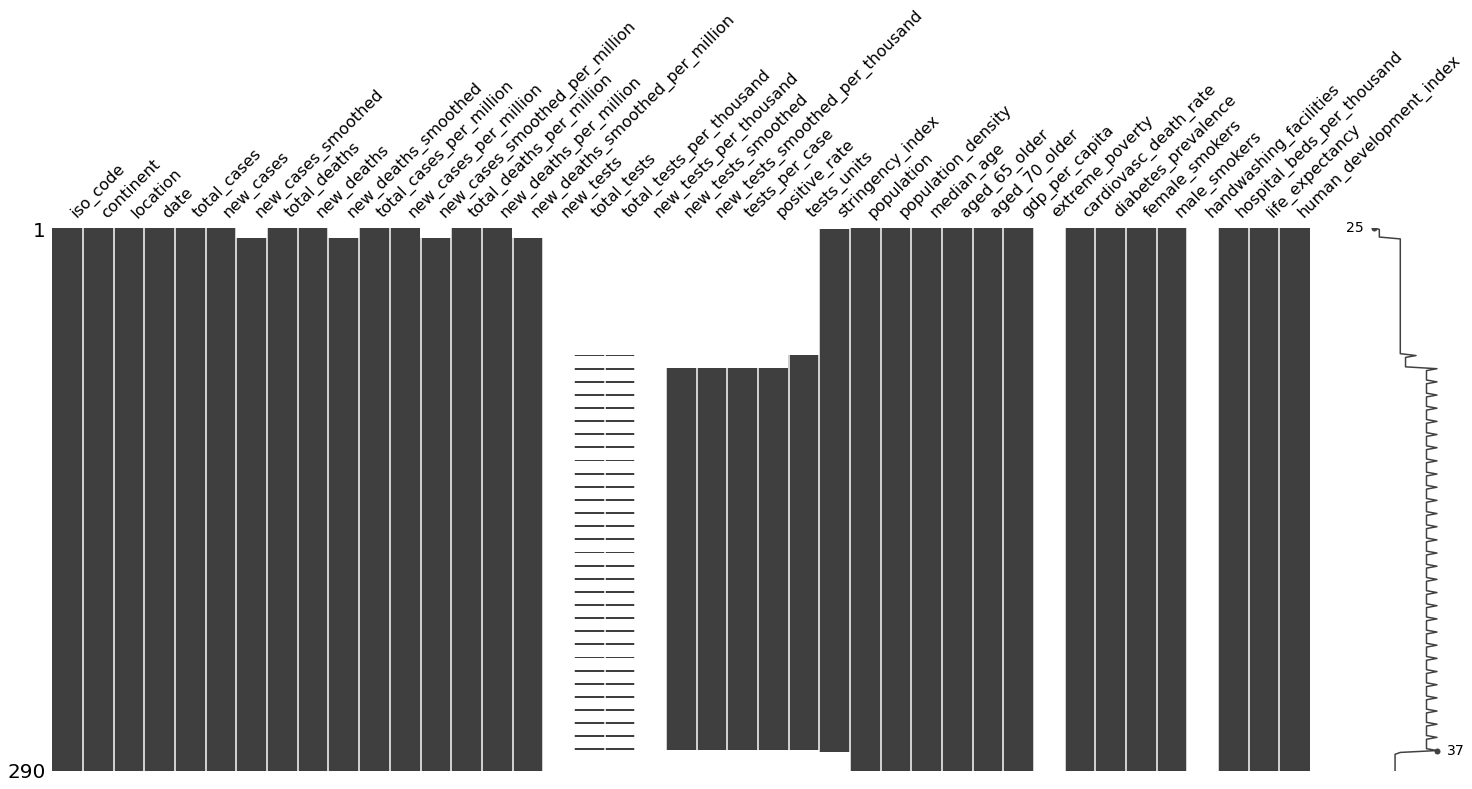

In [9]:
#let us visualize missing values as a matrix
msno.matrix(germany_data)

In [10]:
germany_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         290 non-null    object 
 1   continent                        290 non-null    object 
 2   location                         290 non-null    object 
 3   date                             290 non-null    object 
 4   total_cases                      290 non-null    float64
 5   new_cases                        290 non-null    float64
 6   new_cases_smoothed               284 non-null    float64
 7   total_deaths                     290 non-null    float64
 8   new_deaths                       290 non-null    float64
 9   new_deaths_smoothed              284 non-null    float64
 10  total_cases_per_million          290 non-null    float64
 11  new_cases_per_million            290 non-null    float64
 12  new_cases_smoothed_per

We can observe that the columns 'new_tests', 'new_tests_per_thousand', 'extreme_poverty' and 'handwashing_facilities' contain 0 non-null values. Moreover, the columns 'total_tests' and 'total_tests_per_thousand' contain only 31 non-null vaues, which is only about 10.6% of non-null, which is insufficient to help replace the null values. 

Hence these columns cannot be used for analysis. It would be appropriate to drop such columns. 

In [11]:
germany_data= germany_data.drop(['new_tests', 'new_tests_per_thousand', 'extreme_poverty','handwashing_facilities','total_tests','total_tests_per_thousand'],
                               axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         290 non-null    object 
 1   continent                        290 non-null    object 
 2   location                         290 non-null    object 
 3   date                             290 non-null    object 
 4   total_cases                      290 non-null    float64
 5   new_cases                        290 non-null    float64
 6   new_cases_smoothed               284 non-null    float64
 7   total_deaths                     290 non-null    float64
 8   new_deaths                       290 non-null    float64
 9   new_deaths_smoothed              284 non-null    float64
 10  total_cases_per_million          290 non-null    float64
 11  new_cases_per_million            290 non-null    float64
 12  new_cases_smoothed_per

<AxesSubplot:>

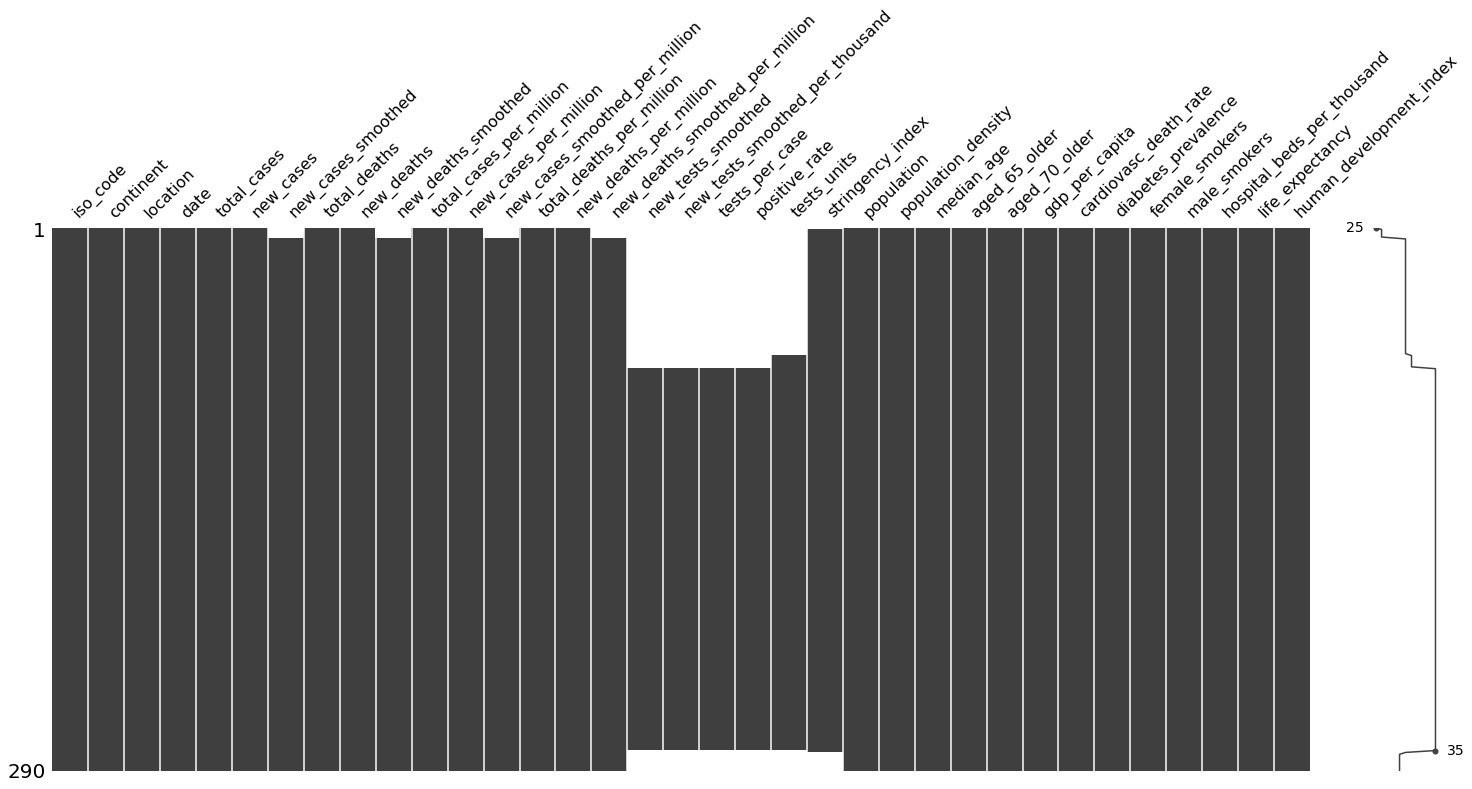

In [12]:
msno.matrix(germany_data)

Now, to fill up Nan values in the rest of the variables. Let us understand their distribution first!

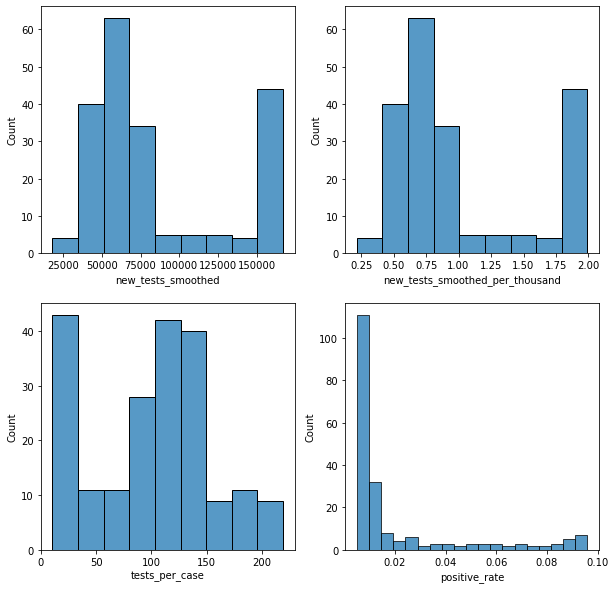

In [27]:

fig=plt.figure()

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)


sns.histplot(germany_data, x='new_tests_smoothed', ax=ax1)
sns.histplot(germany_data, x='new_tests_smoothed_per_thousand', ax=ax2)
sns.histplot(germany_data, x='tests_per_case', ax=ax3)
sns.histplot(germany_data, x='positive_rate', ax=ax4)

fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

In [31]:
germany_data.describe().loc[:,['new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case','positive_rate']]

,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate
count,204.000000,204.000000,204.000000,204.000000
mean,85690.705882,1.022770,98.596422,0.021765
std,44744.959892,0.534073,55.669042,0.025668
min,18208.000000,0.217000,10.426000,0.005000
25%,51702.000000,0.616750,45.583250,0.008000
50%,61866.000000,0.738500,112.582500,0.009000
75%,121862.000000,1.454500,130.179750,0.022250
max,166913.000000,1.992000,219.125000,0.096000
